[![Labellerr](https://storage.googleapis.com/labellerr-cdn/%200%20Labellerr%20template/notebook.webp)](https://www.labellerr.com)

# **Fine-Tune YOLO for Fire Detection**

[![labellerr](https://img.shields.io/badge/Labellerr-BLOG-black.svg)](https://www.labellerr.com/blog/)
[![Youtube](https://img.shields.io/badge/Labellerr-YouTube-b31b1b.svg)](https://www.youtube.com/@Labellerr)
[![Github](https://img.shields.io/badge/Labellerr-GitHub-green.svg)](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)

## 🎯 Objective

This notebook provides a complete guide to building a custom fire detection system using a YOLO segmentation model. The workflow covers every step, from creating a dataset with video annotations and converting them to the required format, to fine-tuning the model and performing real-time inference on video streams.


## 🚀 Key Features

* **Video Dataset Creation**: Using videos as the primary data source for training a robust detection model.
* **Format Conversion**: Transforming video annotations in COCO JSON format into the YOLO segmentation format.
* **Model Training**: Fine-tuning a pre-trained `yolov8x-seg.pt` model on a custom fire dataset.
* **Video Inference**: Applying the trained model to a video to detect fire and overlay visual alerts with segmentation masks.


## 📚 Libraries & Prerequisites

* **Core Libraries**: `ultralytics`, `opencv-python`, `matplotlib`.
* **Environment**: A Python environment with GPU support is highly recommended for efficient model training.
* **Dataset**: A dataset of fire videos and a corresponding `annotations.json` file created using an annotation tool like Labellerr.


## Annotate your Custom dataset using Labellerr

 ***1. Visit the [Labellerr](https://www.labellerr.com/?utm_source=githubY&utm_medium=social&utm_campaign=github_clicks) website and click **“Sign Up”**.*** 

 ***2. After signing in, create your workspace by entering a unique name.***

 ***3. Navigate to your workspace’s API keys page (e.g., `https://<your-workspace>.labellerr.com/workspace/api-keys`) to generate your **API Key** and **API Secret**.***

 ***4. Store the credentials securely, and then use them to initialise the SDK or API client with `api_key`, `api_secret`.*** 


### Use Labellerr SDK for uploading and perform annotation of your own dataset

In [ ]:
# uncomment the following lines to install required packages in a Jupyter notebook environment

# !pip install git+https://github.com/Labellerr/SDKPython.git
# !pip install ipyfilechooser
# !git clone https://github.com/Labellerr/yolo_finetune_utils.git

In [ ]:
# all the imports required for this notebook
from labellerr.client import LabellerrClient
from labellerr.core.datasets import create_dataset_from_local
from labellerr.core.annotation_templates import create_template
from labellerr.core.projects import create_project
from labellerr.core.schemas import DatasetConfig, AnnotationQuestion, QuestionType, CreateTemplateParams, DatasetDataType, CreateProjectParams, RotationConfig
from labellerr.core.projects import LabellerrProject
from labellerr.core.exceptions import LabellerrError

import uuid
from ipyfilechooser import FileChooser

In [ ]:
api_key = input("YOUR_API_KEY")        # go to labellerr workspace to get your API key
api_secret = input("YOUR_API_SECRET")  # go to labellerr workspace to get your API secret
client_id = input("YOUR_CLIENT_ID")   # Contact labellerr support to get your client ID i.e. support@tensormatics.com

client = LabellerrClient(api_key, api_secret, client_id)


### ***STEP-1: Create a dataset on labellerr from your local folder***

The SDK supports in creating dataset by uploading local files. 

In [ ]:
# Create a folder chooser starting from a directory (for example, your home directory)
chooser = FileChooser('/')

# Set the chooser to folder selection mode only
chooser.title = 'Select a folder containing your dataset'
chooser.show_only_dirs = True

# Display the widget
display(chooser)

FileChooser(path='D:\', filename='', title='Select a folder containing your dataset', show_hidden=False, selec…

In [ ]:
path_to_dataset = chooser.selected_path
print("You selected:", path_to_dataset)

You selected: D:\Professional\Projects\Cell_Segmentation_using_YOLO\frames_output


In [ ]:
my_dataset_type = input("Enter your dataset type (video or image): ").lower()
print("Selected dataset type:", my_dataset_type)

Selected dataset type: video


In [ ]:
dataset = create_dataset_from_local(
    client=client,
    dataset_config=DatasetConfig(dataset_name="My Dataset", data_type="image"),
    folder_to_upload=path_to_dataset
)

print(f"Dataset created with ID: {dataset.dataset_id}")


### ***STEP-2: Create annotation project on labellerr of your created dataset***

Create a annotation project of your uploaded dataset to start performing annotation on labellerr UI

In [ ]:
# Create annotation guideline template for video annotation project (like classes to be annotated)

template = create_template(
    client=client,
    params=CreateTemplateParams(
        template_name="My Template",
        data_type=DatasetDataType.image,
        questions=[
            AnnotationQuestion(
                question_number=1,
                question="Object",
                question_id=str(uuid.uuid4()),
                question_type=QuestionType.polygon,
                required=True,
                color="#FF0000"
            )
        ]
    )
)
print(f"Annotation template created with ID: {template.annotation_template_id}")


In [ ]:
dataset.status()        # wait until dataset is processed before creating project

project = create_project(
    client=client,
    params=CreateProjectParams(
        project_name="My Project",
        data_type=DatasetDataType.image,
        rotations=RotationConfig(
            annotation_rotation_count=1,
            review_rotation_count=1,
            client_review_rotation_count=1
        )
    ),
    datasets=[dataset],
    annotation_template=template
)

print(f"✓ Project created: {project.project_id}")

Your project has been created now go to labellerr platform to perform annotation 

***click to go to labellerr.com***

[![Labellerr](https://cdn.labellerr.com/1%20%20Documentation/1c9dc7ce-9a54-4111-8fd5-0363ba3e00e1.webp)](https://www.labellerr.com/?utm_source=githubY&utm_medium=social&utm_campaign=github_clicks)
Open the project you created (Projects → select your project).

Click Start Labeling to open the annotation interface. Use the configured labeling tools (bounding boxes, polygon, dot, classification, etc.) to annotate files.
### ***STEP-3: Export your annotation in required format***

Generate a temporary download URL to retrieve your exported JSON file:

### Export Configuration Parameters

| Parameter | Type | Description |
|-----------|------|-------------|
| `export_name` | string | Display name for the export |
| `export_description` | string | Description of what this export contains |
| `export_format` | string | Output format (e.g., `json`, `xml`, `coco`) |
| `statuses` | list | Annotation statuses to include in export |

### Common Annotation Statuses

- **`review`**: Annotations pending review
- **`r_assigned`**: Review assigned to a reviewer
- **`client_review`**: Under client review
- **`cr_assigned`**: Client review assigned
- **`accepted`**: Annotations accepted and finalized

---

In [ ]:
export_config = {
    "export_name": "Weekly Export",
    "export_description": "Export of all accepted annotations",
    "export_format": "coco_json",
    "statuses": ['review', 'r_assigned','client_review', 'cr_assigned','accepted']
}

try:
    # Get project instance
    project = LabellerrProject(client=client, project_id=project.project_id)
    
    # Create export
    result = project.create_local_export(export_config)
    export_id = result["response"]['report_id']
    print(f"Local export created successfully. Export ID: {export_id}")
except LabellerrError as e:
    print(f"Local export creation failed: {str(e)}")
    
    
try:
    download_url = client.fetch_download_url(
        project_id=project.project_id,
        uuid=str(uuid.uuid4()),
        export_id=export_id
    )
    print(f"Download URL: {download_url}")
except LabellerrError as e:
    print(f"Failed to fetch download URL: {str(e)}")


Now you can download your annotations locally using given URL

## **Convert JSON to YOLO format**

YOLO models require a specific text-based annotation format. We'll clone a utility repository containing a script that converts our video annotations from COCO JSON. This script automatically extracts the annotated frames and creates the corresponding `.txt` label files for training.

In [2]:
!git clone https://github.com/Labellerr/yolo_finetune_utils.git

Cloning into 'yolo_finetune_utils'...


In [3]:
from yolo_finetune_utils.video_annotation.yolo_converter import convert_to_yolo_segmentation

In [4]:
convert_to_yolo_segmentation(
        annotation_path="annotations.json",
        videos_dir="dataset",
        use_split=True,
        split_ratio=(0.5, 0.4, 0.1),  # 50% train, 40% val, 10% test
        output_dir="yolo_format"
    )

Using split ratio: Train=0.5, Val=0.4, Test=0.1
Creating output directory structure in: yolo_format
Loading JSON annotation file...
Found classes: ['Fire']
Aggregating annotations from JSON...


Processing files in JSON: 100%|██████████| 3/3 [00:00<00:00, 13.10it/s]



Extracting frames and saving to YOLO format...
Processing train set (812 frames)...


Exporting train set: 100%|██████████| 812/812 [03:38<00:00,  3.72it/s]


Processing val set (650 frames)...


Exporting val set: 100%|██████████| 650/650 [02:48<00:00,  3.86it/s]


Processing test set (163 frames)...


Exporting test set: 100%|██████████| 163/163 [00:43<00:00,  3.71it/s]


Creating data.yaml file...

Conversion complete! ✨
Dataset saved to: d:\professional\USE_CASE_PROJECT\Smart city\TUTORIAL\yolo_format
YAML file saved to: d:\professional\USE_CASE_PROJECT\Smart city\TUTORIAL\yolo_format\data.yaml


### **Model Training on Custom Dataset**

With the dataset prepared, we can now fine-tune the segmentation model. We'll use the powerful `ultralytics` library and start with a pre-trained `yolov8x-seg.pt` checkpoint to leverage transfer learning, training it on our custom fire dataset for 200 epochs.

In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [ ]:
model = YOLO("yolov8x-seg.pt")
model.train(data="yolo_format/data.yaml", epochs=200, imgsz=640, batch=30)

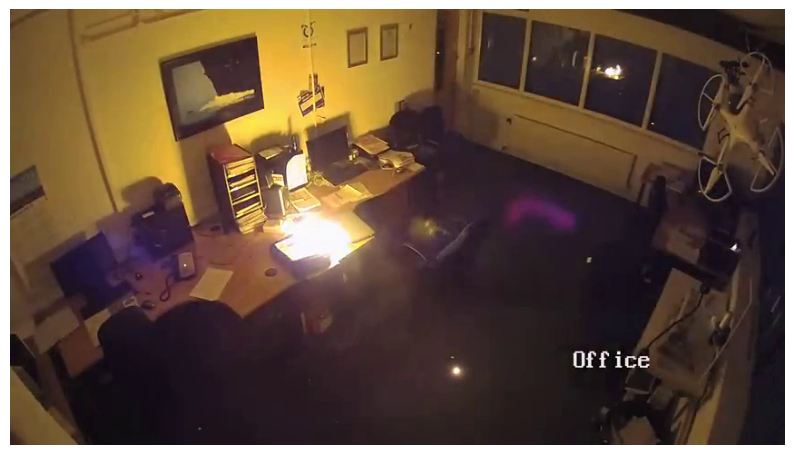

In [8]:
cap = cv2.VideoCapture("dataset/1_cut.mp4")

if cap.isOpened() == False:
    print("Error opening video stream or file")

cap.set(cv2.CAP_PROP_POS_FRAMES, 300)
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
cap.release()

plt.figure(figsize=(10, 6))
plt.imshow(frame)
# plt.imsave('frame.png', frame)
plt.axis('off')
plt.show()

Before processing a full video, we'll test the model on a single frame to ensure it's working correctly. We extract a frame from a test video, run the prediction, and use `matplotlib` to visualize the resulting segmentation mask.


0: 384x640 1 Fire, 1815.0ms
Speed: 379.1ms preprocess, 1815.0ms inference, 24.5ms postprocess per image at shape (1, 3, 384, 640)


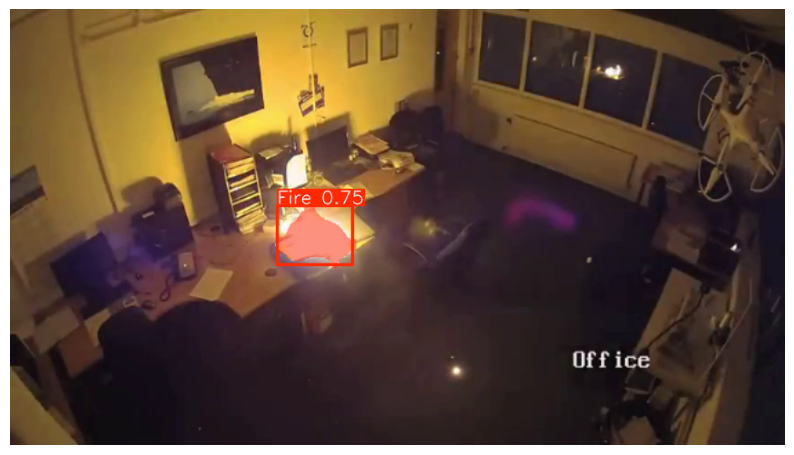

In [9]:
model = YOLO("runs/segment/train2/weights/last.pt")
result = model.predict(source=frame, conf=0.25)


plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(result[0].plot())

### **Model Inference on Video**

Finally, we'll create a pipeline to process an entire video. This script reads the video frame by frame, runs our fine-tuned model for inference, and if a fire is detected, it draws a translucent red overlay and a solid outline around the mask. It also adds a "Fire Detected" label before writing the processed frame to a new output video file.

In [10]:
import cv2
import numpy as np

video_path = "assests/3_cut.mp4"
output_path = "3_output.mp4"

cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model.predict(source=frame_rgb, conf=0.1)
    masks = results[0].masks

    mask_detected = masks is not None and masks.data.shape[0] > 0

    if mask_detected:
        # Take first mask (if multiple, loop over masks.data)
        mask = masks.data[0].cpu().numpy()
        mask = cv2.resize(mask, (width, height))
        mask = (mask > 0.5).astype(np.uint8)

        # --- Translucent red fill ---
        red_overlay = np.zeros_like(frame, dtype=np.uint8)
        red_overlay[:] = (0, 0, 255)  # Red in BGR
        frame = np.where(mask[:, :, None] == 1,
                         cv2.addWeighted(frame, 0.5, red_overlay, 0.5, 0),
                         frame)

        # --- Solid red outline ---
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(frame, contours, -1, (0, 0, 255), 3)  # thickness=3

        # Draw "Fire Detection" label
        label = "Fire Detected"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1
        thickness = 2
        text_size, _ = cv2.getTextSize(label, font, font_scale, thickness)
        text_w, text_h = text_size
        x, y = width - text_w - 20, 40

        # Red rectangle background
        cv2.rectangle(frame, (x - 10, y - text_h - 10),
                      (x + text_w + 10, y + 10), (0, 0, 255), -1)
        # White text
        cv2.putText(frame, label, (x, y), font, font_scale,
                    (255, 255, 255), thickness, cv2.LINE_AA)

    out.write(frame)

cap.release()
out.release()

---

## 👨‍💻 About Labellerr's Hands-On Learning in Computer Vision

Thank you for exploring this **Labellerr Hands-On Computer Vision Cookbook**! We hope this notebook helped you learn, prototype, and accelerate your vision projects.  
Labellerr provides ready-to-run Jupyter/Colab notebooks for the latest models and real-world use cases in computer vision, AI agents, and data annotation.

---
## 🧑‍🔬 Check Our Popular Youtube Videos

Whether you're a beginner or a practitioner, our hands-on training videos are perfect for learning custom model building, computer vision techniques, and applied AI:

- [How to Fine-Tune YOLO on Custom Dataset](https://www.youtube.com/watch?v=pBLWOe01QXU)  
  Step-by-step guide to fine-tuning YOLO for real-world use—environment setup, annotation, training, validation, and inference.
- [Build a Real-Time Intrusion Detection System with YOLO](https://www.youtube.com/watch?v=kwQeokYDVcE)  
  Create an AI-powered system to detect intruders in real time using YOLO and computer vision.
- [Finding Athlete Speed Using YOLO](https://www.youtube.com/watch?v=txW0CQe_pw0)  
  Estimate real-time speed of athletes for sports analytics.
- [Object Counting Using AI](https://www.youtube.com/watch?v=smsjBBQcIUQ)  
  Learn dataset curation, annotation, and training for robust object counting AI applications.
---

## 🎦 Popular Labellerr YouTube Videos

Level up your skills and see video walkthroughs of these tools and notebooks on the  
[Labellerr YouTube Channel](https://www.youtube.com/@Labellerr/videos):

- [How I Fixed My Biggest Annotation Nightmare with Labellerr](https://www.youtube.com/watch?v=hlcFdiuz_HI) – Solving complex annotation for ML engineers.
- [Explore Your Dataset with Labellerr's AI](https://www.youtube.com/watch?v=LdbRXYWVyN0) – Auto-tagging, object counting, image descriptions, and dataset exploration.
- [Boost AI Image Annotation 10X with Labellerr's CLIP Mode](https://www.youtube.com/watch?v=pY_o4EvYMz8) – Refine annotations with precision using CLIP mode.
- [Boost Data Annotation Accuracy and Efficiency with Active Learning](https://www.youtube.com/watch?v=lAYu-ewIhTE) – Speed up your annotation workflow using Active Learning.

> 👉 **Subscribe** for Labellerr's deep learning, annotation, and AI tutorials, or watch videos directly alongside notebooks!

---

## 🤝 Stay Connected

- **Website:** [https://www.labellerr.com/](https://www.labellerr.com/)
- **Blog:** [https://www.labellerr.com/blog/](https://www.labellerr.com/blog/)
- **GitHub:** [Labellerr/Hands-On-Learning-in-Computer-Vision](https://github.com/Labellerr/Hands-On-Learning-in-Computer-Vision)
- **LinkedIn:** [Labellerr](https://in.linkedin.com/company/labellerr)
- **Twitter/X:** [@Labellerr1](https://x.com/Labellerr1)

*Happy learning and building with Labellerr!*
